# Code for trial and error analysis and sanity checks

In [1]:
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import nibabel as nib

sys.path.append('../')
from lib.stats_utils import *

In [2]:
project_dir = '../../../'
data_dir = project_dir + 'data/preproc_T1s/'
metadata_dir = '../metadata/'
results_dir = '../results/MAGeT/'

### Check cerebellum volumes of the atlas labels

In [3]:
atlas_volume_csv = metadata_dir + 'atlas_volumes.csv'
atlas_volume_df = pd.read_csv(atlas_volume_csv)

cols_L = ['L_I_II', 'L_III', 'L_IV', 'L_V', 'L_VI', 'L_Crus_I','L_Crus_II', 'L_VIIB', 'L_VIIIA', 'L_VIIIB', 'L_IX', 'L_X', 'L_CM']
cols_R = ['R_I_II', 'R_III', 'R_IV', 'R_V', 'R_VI', 'R_Crus_I', 'R_Crus_II','R_VIIB', 'R_VIIIA', 'R_VIIIB', 'R_IX', 'R_X', 'R_CM']

atlas_volume_df['L_CB'] = atlas_volume_df[cols_L].sum(axis=1)
atlas_volume_df['R_CB'] = atlas_volume_df[cols_R].sum(axis=1)
atlas_volume_df.head()

,Subject,L_I_II,L_III,L_IV,L_V,L_VI,L_Crus_I,L_Crus_II,L_VIIB,L_VIIIA,...,R_Crus_I,R_Crus_II,R_VIIB,R_VIIIA,R_VIIIB,R_IX,R_X,R_CM,L_CB,R_CB
0,./brain1_labels.mnc,37.368,743.472,2583.41,4135.21,4757.02,7213.02,7264.76,3425.79,3643.14,...,7504.68,5859.70,4653.21,4726.27,3324.65,3362.07,795.420,7760.88,48358.997,51838.546
1,./brain2_labels.mnc,113.049,761.886,2564.38,3522.39,8386.36,12197.60,8419.19,5497.85,4775.63,...,11959.30,9367.65,4867.48,4133.27,2811.97,3225.10,613.251,7047.89,60424.136,60017.068
2,./brain3_labels.mnc,49.707,930.285,2574.02,2700.59,8494.58,13195.50,9244.75,4529.52,6643.57,...,13760.60,11399.20,5373.43,3847.61,4277.80,4241.54,736.587,8461.94,66517.968,67308.269
3,./brain5_labels.mnc,333.261,765.126,1374.27,4298.99,8528.63,12043.70,3728.16,3154.82,11588.90,...,13493.80,8975.99,5367.87,5210.14,3640.90,2904.42,544.887,8049.94,61502.125,64707.372
4,./brain4_labels.mnc,159.354,1030.270,1425.28,3774.65,6617.40,11753.60,7068.47,3461.02,3914.46,...,11697.20,6630.82,3273.21,3016.93,3353.37,2694.25,701.433,7384.72,53479.383,51091.875


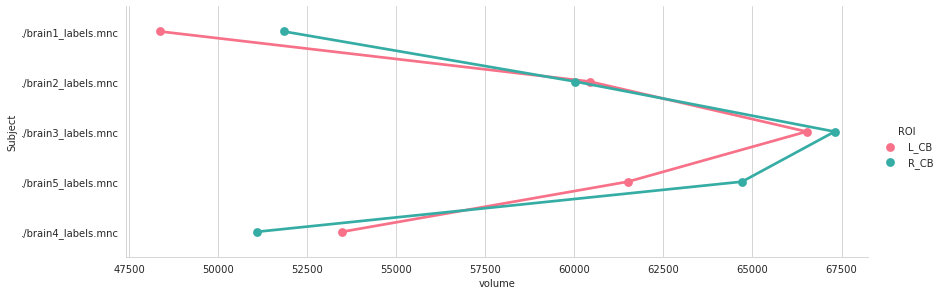

In [4]:


plot_df = atlas_volume_df.copy()
plot_df = pd.melt(plot_df, id_vars = ['Subject'], value_vars = ['L_CB','R_CB'] , 
                      var_name ='ROI', value_name ='volume')

palette = sns.color_palette('husl',2)


with sns.axes_style("whitegrid"):
    g = sns.catplot(x='volume', y='Subject', hue='ROI', kind='point',aspect=3, height=4, palette = palette,
                    data=plot_df)